6856: Ahmed Yasser Mohamed Dusuki  
6940: Ahmed Ashraf Abdelkarim Hussein  
6921: Hazem Abdelsalam  
6962: Abdelrahman Sewelam  

---


*All imports.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
import random
import numpy as np
from torch import nn
from torch.utils.data import Dataset,TensorDataset
import torch


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

Using pandas to get the data.

In [ ]:
import pandas as pd

data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
)
col_names = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class",
]
df = pd.read_csv(data_url, names=col_names, header=None)

Randomly balancing the data.

In [ ]:
g = df.groupby("class")
balanced_df = pd.DataFrame(
    g.apply(
        lambda x: x.sample(g.size().min(), random_state=SEED).reset_index(drop=True)
    )
)


Splitting data into 70% training and 30% testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = balanced_df[col_names[: len(col_names) - 1]]
y = balanced_df["class"]

train_count = round(0.7 * (balanced_df.shape[0] / 2)) * 2
train_percentage = train_count / balanced_df.shape[0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=train_percentage, random_state=SEED
)  # 70% training and 30% test, stratify to stay balanced

Splitting data into 70% training and 30% testing. (With feature scaling)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X = balanced_df[col_names[: len(col_names) - 1]]
y = balanced_df["class"]
Xs = (X-X.min())/(X.max()-X.min())

train_count = round(0.7 * (balanced_df.shape[0] / 2)) * 2
train_percentage = train_count / balanced_df.shape[0]

Xs_train, Xs_test, y_train, y_test = train_test_split(
    Xs, y, stratify=y, train_size=train_percentage, random_state=SEED
)  # 70% training and 30% test, stratify to stay balanced

**Decision Tree.**

Accuracy: 0.79
Precision: 0.79
recall: 0.8
specificity: 0.79
f1-score: 0.79


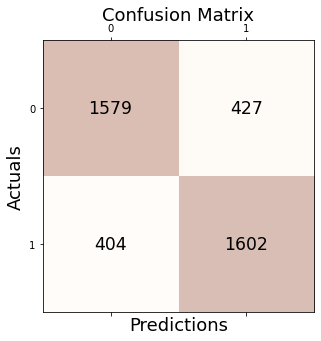

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(random_state=SEED)  # Create Decision Tree classifer object
clf = clf.fit(X_train, y_train)  # Train Decision Tree Classifer

y_pred = clf.predict(X_test)  # Prediction for test data

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}")

scores_pos = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["g"]
)
precision = scores_pos[0][0]
recall = scores_pos[1][0]
f1score = scores_pos[2][0]
specificity = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["h"]
)[1][
    0
]  # specificity is recall of negative class

print(f"Precision: {round(precision,2)}")
print(f"recall: {round(recall,2)}")
print(f"specificity: {round(specificity,2)}")
print(f"f1-score: {round(f1score,2)}")

conf_matrix = metrics.confusion_matrix(
    y_true=y_test, y_pred=y_pred, labels=["h", "g"]
)  # h is negative, g is positive


fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(
            x=j, y=i, s=conf_matrix[i, j], va="center", ha="center", size="xx-large"
        )
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

**AdaBoost.**

Perform grid search (step = 10) with cross validation (10 splits).

Best params: {'n_estimators': 91}
Best cross-validation score: 0.8147187331819135


(0.7, 0.85)

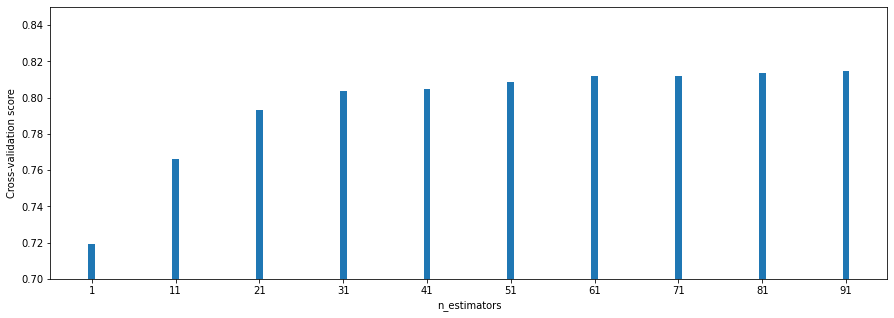

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier(random_state=SEED)

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(1, 100, 10)}
gscv = GridSearchCV(ab, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Perform another grid search (step = 10) with cross validation (10 splits). From 101 to 151.

Best params: {'n_estimators': 151}
Best cross-validation score: 0.8197365660546023


(0.7, 0.85)

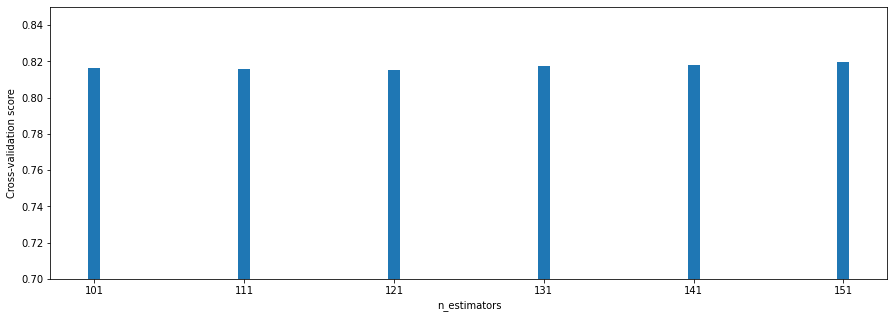

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier(random_state=SEED)

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(101, 152, 10)}
gscv = GridSearchCV(ab, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Perform another grid search (step = 10) with cross validation (10 splits). From 161 to 211.

Best params: {'n_estimators': 201}
Best cross-validation score: 0.8195231188827774


(0.7, 0.85)

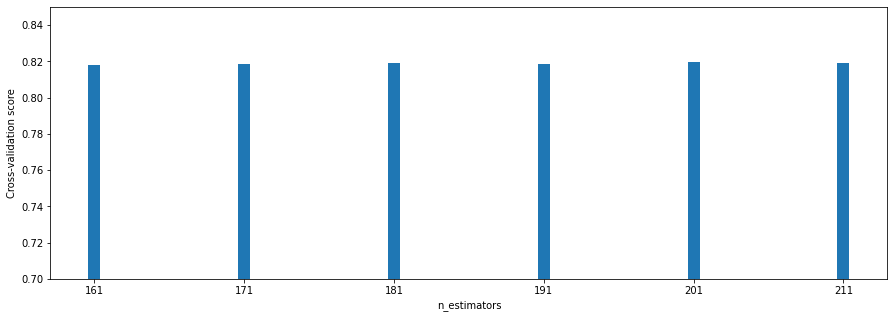

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier(random_state=SEED)

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(161, 212, 10)}
gscv = GridSearchCV(ab, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Fine grid search (step = 1) with cross validation (10 splits). From 145 to 155, since previous grid searches showed highest peak around 151.

Best params: {'n_estimators': 151}
Best cross-validation score: 0.8197365660546023


(0.7, 0.85)

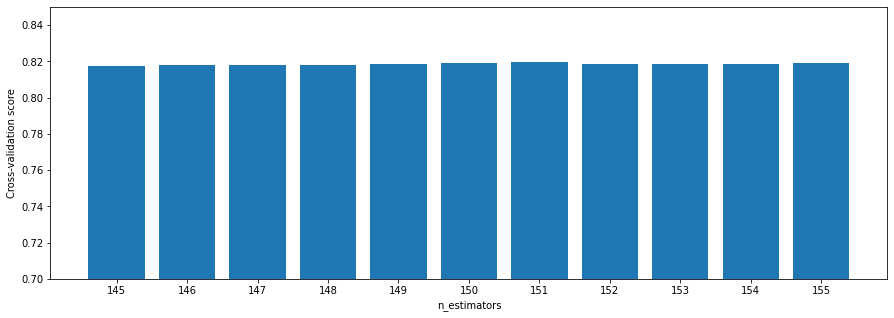

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier(random_state=SEED)

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(145, 156, 1)}
gscv = GridSearchCV(ab, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

AdaBoost using n_estimators = 151 as it's the best found.

Accuracy: 0.83
Precision: 0.83
recall: 0.83
specificity: 0.83
f1-score: 0.83


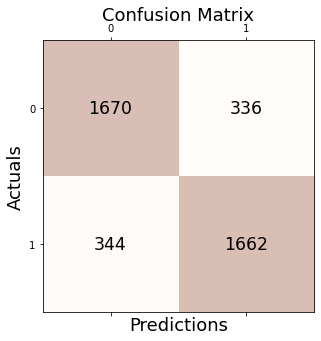

In [ ]:
ab = AdaBoostClassifier(n_estimators=151, random_state=SEED)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}")

scores_pos = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["g"]
)
precision = scores_pos[0][0]
recall = scores_pos[1][0]
f1score = scores_pos[2][0]
specificity = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["h"]
)[1][
    0
]  # specificity is recall of negative class

print(f"Precision: {round(precision,2)}")
print(f"recall: {round(recall,2)}")
print(f"specificity: {round(specificity,2)}")
print(f"f1-score: {round(f1score,2)}")

conf_matrix = metrics.confusion_matrix(
    y_true=y_test, y_pred=y_pred, labels=["h", "g"]
)  # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(
            x=j, y=i, s=conf_matrix[i, j], va="center", ha="center", size="xx-large"
        )
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

**K-Nearest Neighbours (K-NN).**

Perform grid search (step = 10) with cross validation (10 splits).

Best params: {'n_neighbors': 21}
Best cross-validation score: 0.7668733866039095


(0.7, 0.85)

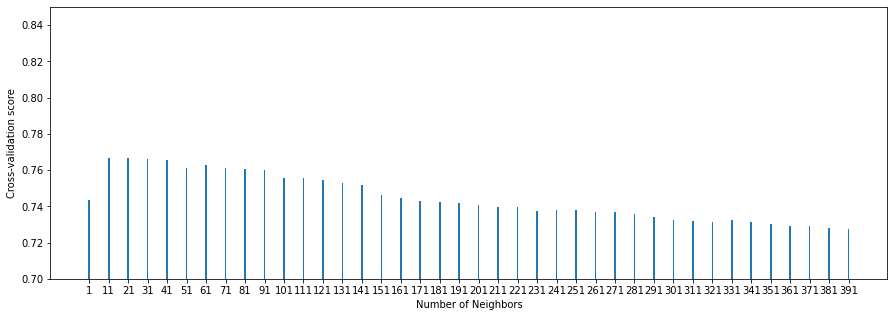

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {"n_neighbors": range(1, 392, 10)}
gscv = GridSearchCV(knn, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Fine grid search (step = 1) with cross validation (10 splits). From 1 to 40, since previous grid search showed peak around 21.

Best params: {'n_neighbors': 13}
Best cross-validation score: 0.7695402220215454


(0.7, 0.85)

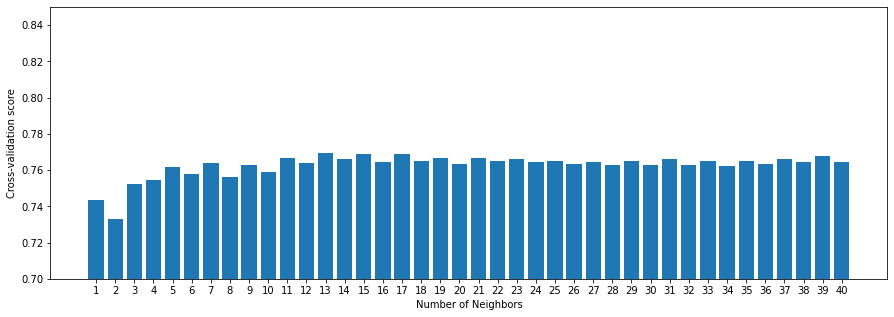

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {"n_neighbors": range(1, 41, 1)}
gscv = GridSearchCV(knn, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

KNN using k = 13 as it's the best found.

Accuracy: 0.77
Precision: 0.73
recall: 0.86
specificity: 0.68
f1-score: 0.79


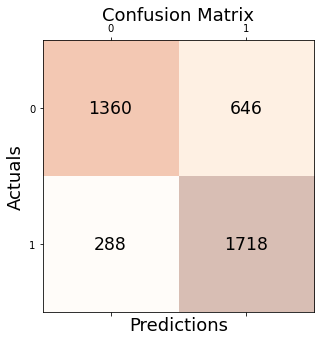

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}")

scores_pos = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["g"]
)
precision = scores_pos[0][0]
recall = scores_pos[1][0]
f1score = scores_pos[2][0]
specificity = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["h"]
)[1][
    0
]  # specificity is recall of negative class

print(f"Precision: {round(precision,2)}")
print(f"recall: {round(recall,2)}")
print(f"specificity: {round(specificity,2)}")
print(f"f1-score: {round(f1score,2)}")

conf_matrix = metrics.confusion_matrix(
    y_true=y_test, y_pred=y_pred, labels=["h", "g"]
)  # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(
            x=j, y=i, s=conf_matrix[i, j], va="center", ha="center", size="xx-large"
        )
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

**K-Nearest Neighbours (K-NN).** *(using scaled features)*

Perform grid search (step = 10) with cross validation (10 splits).

Best params: {'n_neighbors': 11}
Best cross-validation score: 0.8098063696649609


(0.7, 0.85)

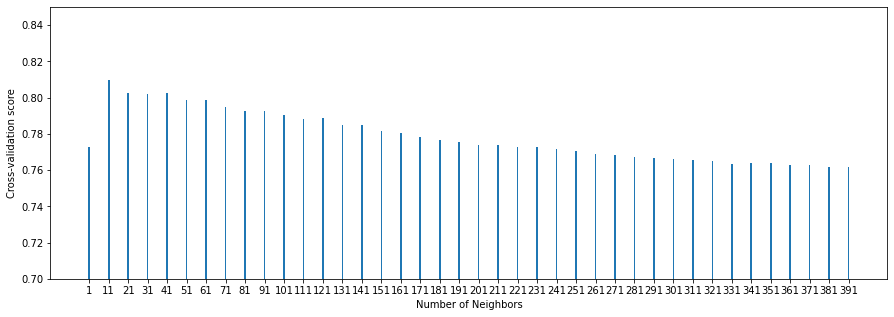

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knns = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {"n_neighbors": range(1, 392, 10)}
gscv = GridSearchCV(knns, param_grid, cv=10)  # 10 splits
gscv.fit(Xs_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

Fine grid search (step = 1) with cross validation (10 splits). From 1 to 50, since previous grid search showed peak around 11.

Best params: {'n_neighbors': 15}
Best cross-validation score: 0.8107669959590984


(0.7, 0.85)

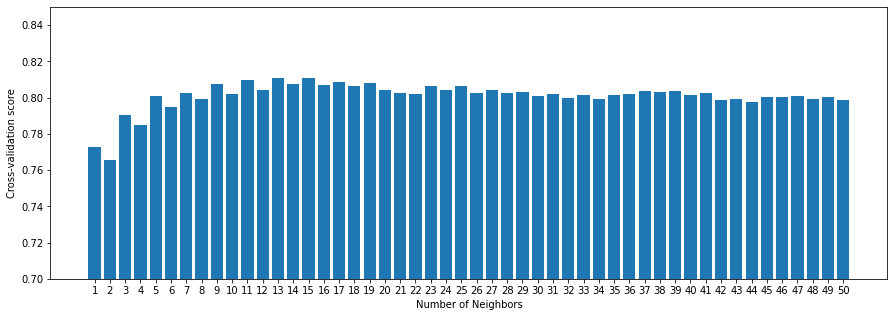

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knns = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {"n_neighbors": range(1, 51, 1)}
gscv = GridSearchCV(knns, param_grid, cv=10)  # 10 splits
gscv.fit(Xs_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.7, 0.85))

KNN using k = 15 as it's the best found.

Accuracy: 0.81
Precision: 0.78
recall: 0.88
specificity: 0.75
f1-score: 0.82


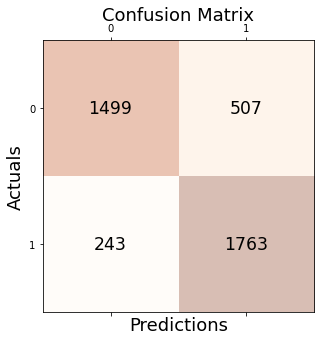

In [ ]:
knns = KNeighborsClassifier(n_neighbors=15)
knns.fit(Xs_train, y_train)
y_pred = knns.predict(Xs_test)

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}")

scores_pos = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["g"]
)
precision = scores_pos[0][0]
recall = scores_pos[1][0]
f1score = scores_pos[2][0]
specificity = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["h"]
)[1][
    0
]  # specificity is recall of negative class

print(f"Precision: {round(precision,2)}")
print(f"recall: {round(recall,2)}")
print(f"specificity: {round(specificity,2)}")
print(f"f1-score: {round(f1score,2)}")

conf_matrix = metrics.confusion_matrix(
    y_true=y_test, y_pred=y_pred, labels=["h", "g"]
)  # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(
            x=j, y=i, s=conf_matrix[i, j], va="center", ha="center", size="xx-large"
        )
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()


We can see KNN's accuracy improved from 77% to 81% after using scaled features, meaning some features were contributing more to the distance calculation than they should have, so scaling all the features from 0 to 1 reduced their contribution and gave us an overall better score. We might even be able to get a higher score if we know some features should contribute more and increase their contribution by scaling them to a higher value. 

**Random Forests.**

Perform grid search (step = 10) with cross validation (10 splits).

Best params: {'n_estimators': 301}
Best cross-validation score: 0.8583942205073475


(0.75, 0.9)

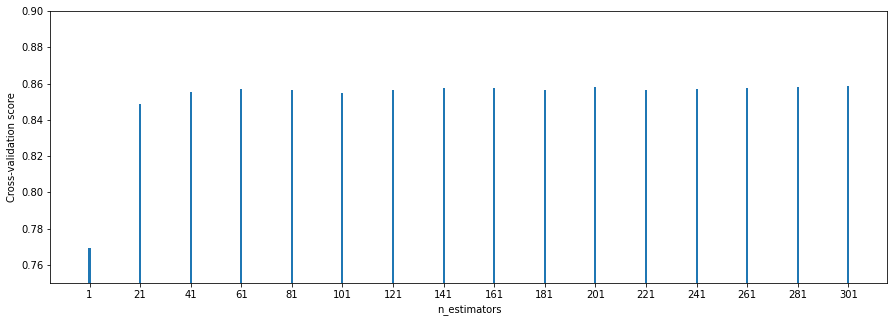

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=SEED)

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(1, 302, 20)}
gscv = GridSearchCV(rf, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.75, 0.9))

In [ ]:
print(gscv.cv_results_["mean_test_score"])

[0.76911652 0.84899741 0.85508397 0.85690077 0.85668653 0.85497724
 0.8564724  0.85743314 0.85764681 0.85657832 0.8578598  0.85668516
 0.85689861 0.85732619 0.85786026 0.85839422]


Fine grid search (step = 1) with cross validation (10 splits). From 155 to 165, since previous grid search showed 161 had one of the highest scores at a reasonable complexity.

Best params: {'n_estimators': 162}
Best cross-validation score: 0.8581807733355225


(0.75, 0.9)

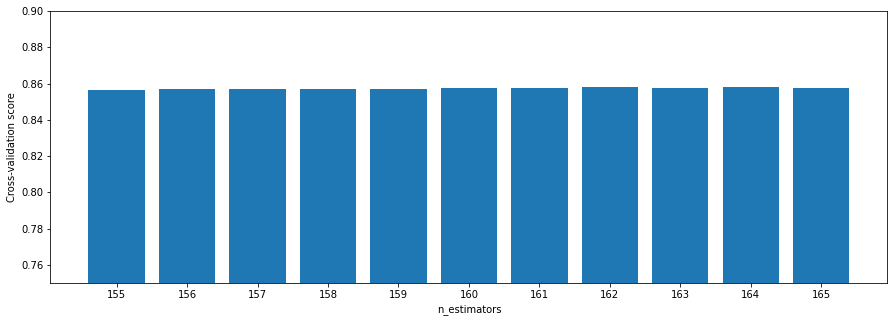

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=SEED)

# Perform grid search with cross-validation
param_grid = {"n_estimators": range(155, 166, 1)}
gscv = GridSearchCV(rf, param_grid, cv=10)  # 10 splits
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(param_grid["n_estimators"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_estimators"])
ax.set_xlabel("n_estimators")
ax.set_ylabel("Cross-validation score")
ax.set_ylim((0.75, 0.9))

Random Forests using n_estimators = 162 as it's the best found.

Accuracy: 0.86
Precision: 0.84
recall: 0.89
specificity: 0.83
f1-score: 0.87


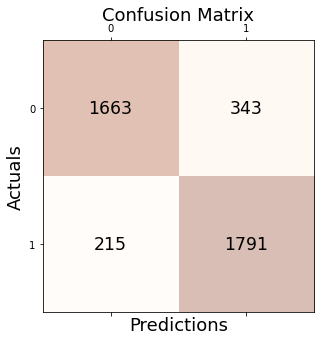

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=162, random_state=SEED)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}")

scores_pos = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["g"]
)
precision = scores_pos[0][0]
recall = scores_pos[1][0]
f1score = scores_pos[2][0]
specificity = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["h"]
)[1][
    0
]  # specificity is recall of negative class

print(f"Precision: {round(precision,2)}")
print(f"recall: {round(recall,2)}")
print(f"specificity: {round(specificity,2)}")
print(f"f1-score: {round(f1score,2)}")

conf_matrix = metrics.confusion_matrix(
    y_true=y_test, y_pred=y_pred, labels=["h", "g"]
)  # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(
            x=j, y=i, s=conf_matrix[i, j], va="center", ha="center", size="xx-large"
        )
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

At 0.86 accuracy it's the most accurate model. However, neural network beats it at precision and specificity.

**Naive Bayes.** *(Gaussian)*

Accuracy: 0.64
Precision: 0.59
recall: 0.89
specificity: 0.38
f1-score: 0.71


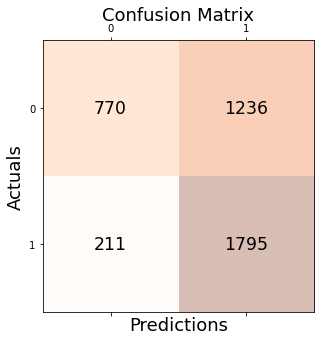

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}")

scores_pos = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["g"]
)
precision = scores_pos[0][0]
recall = scores_pos[1][0]
f1score = scores_pos[2][0]
specificity = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=["h"]
)[1][
    0
]  # specificity is recall of negative class

print(f"Precision: {round(precision,2)}")
print(f"recall: {round(recall,2)}")
print(f"specificity: {round(specificity,2)}")
print(f"f1-score: {round(f1score,2)}")

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = ['h','g']) # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Naive Bayes has relatively low scores, likely due to the fact that we have features that are calculated from other features, meaning they are dependant; this goes against the naive bayes assumption of the features being completely independent, which results in a worse model.

In [ ]:
import numpy as np
import pandas as pd
y_train.replace('g',0 ,inplace=True)
y_train.replace('h',1 ,inplace=True)
tensor_y_train = torch.tensor(y_train.values.astype(np.float32))
tensor_X_train = torch.tensor(Xs_train.values.astype(np.float32))
y_test.replace('g',0 ,inplace=True)
y_test.replace('h',1 ,inplace=True)
tensor_y_test = torch.tensor(y_test.values.astype(np.float32))
tensor_X_test = torch.tensor(Xs_test.values.astype(np.float32))

In [ ]:
from torch.utils.data import Dataset,TensorDataset
dataset_train = TensorDataset( tensor_X_train, tensor_y_train )  
dataset_test = TensorDataset( tensor_X_test , tensor_y_test )

neural network datamodel

In [ ]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
class Network(nn.Module):
    def __init__(self, features_count, layer1, layer2, classes_count):
        super().__init__()
        self.flatten = nn.Flatten()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(features_count, layer1),
            nn.ReLU(),
            nn.Linear(layer1, layer2),
            nn.ReLU(),
            nn.Linear(layer2, classes_count)
        )
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        x = torch.sigmoid(x)
        return x


Using cuda device


In [ ]:
loss_fn = nn.BCELoss()

In [ ]:
def train(dataloader, model, loss_fn):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    size = len(dataloader.dataset)
    model.train()
    correct = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)
        pred = torch.flatten(pred)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred = torch.round(pred.data)
        correct += (pred == y).sum().item()
    correct /= size
    return 100*correct
        #if batch % 20 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            pred = torch.flatten(pred)
            test_loss += loss_fn(pred, y).item()
            pred = torch.round(pred.data)
            correct += (pred == y).sum().item()
    test_loss /= num_batches
    correct /= size
    #print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return 100*correct, test_loss

In [ ]:
from torch.utils.data import DataLoader

batch_s = 128

torch.manual_seed(SEED)

def seed_worker(worker_id):
    np.random.seed(SEED)
    random.seed(SEED)

print(f"Batch size: {batch_s}")

Batch size: 128


In [ ]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5
epochs = 100

layer1_start = 10
layer1_end = 101
layer1_step = 10

layer2_start = 10
layer2_end = 101
layer2_step = 10


layer1_list = range(layer1_start, layer1_end, layer1_step)
layer2_list = range(layer2_start, layer2_end, layer2_step)

results = np.empty((len(layer1_list), len(layer2_list)))
results[:] = np.nan

outer_i = 0
for layer1 in layer1_list:
    valid_layer2_list = []
    for i in range(len(layer2_list)):
        if abs(layer2_list[i] - layer1) <= 30:
            valid_layer2_list.append((layer2_list[i], i))
    for layer2 in valid_layer2_list:
        inner_i = layer2[1]
        layer2 = layer2[0]

        np.random.seed(SEED)
        random.seed(SEED)
        torch.manual_seed(SEED)
        torch.cuda.manual_seed(SEED)
        torch.cuda.manual_seed_all(SEED)

        kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=SEED)
        avg_acc = 0
        avg_loss = 0

        for fold, (train_ids, test_ids) in enumerate(kfold.split(Xs_train, y_train)):
            train_Xs_fold = Xs_train.iloc[train_ids]
            test_Xs_fold = Xs_train.iloc[test_ids]
            train_y_fold = y_train.iloc[train_ids]
            test_y_fold = y_train.iloc[test_ids]

            tensor_Xs_fold_train = torch.tensor(train_Xs_fold.values.astype(np.float32))
            tensor_Xs_fold_test = torch.tensor(test_Xs_fold.values.astype(np.float32))
            tensor_y_fold_train = torch.tensor(train_y_fold.values.astype(np.float32))
            tensor_y_fold_test = torch.tensor(test_y_fold.values.astype(np.float32))

            dataset_train_fold = TensorDataset(
                tensor_Xs_fold_train, tensor_y_fold_train
            )
            dataset_test_fold = TensorDataset(tensor_Xs_fold_test, tensor_y_fold_test)

            train_dataloader_kfold = DataLoader(
                dataset_train_fold,
                batch_size=batch_s,
                shuffle=True,
                worker_init_fn=seed_worker,
                num_workers=0,
            )
            test_dataloader_kfold = DataLoader(
                dataset_test_fold,
                batch_size=batch_s,
                shuffle=True,
                worker_init_fn=seed_worker,
                num_workers=0,
            )

            model = Network(10, layer1, layer2, 1).to(device)
            max_epoch_acc = 0
            max_acc_diff = 0.1

            for t in range(epochs):
                train_acc = train(train_dataloader_kfold, model, loss_fn)
                test_result = test(test_dataloader_kfold, model, loss_fn)

                if train_acc - test_result[0] >= (train_acc * max_acc_diff):
                    break
                if test_result[0] > max_epoch_acc:
                    max_epoch_acc = test_result[0]
            avg_acc += max_epoch_acc / k_folds
        print((layer1, layer2), avg_acc)
        results[outer_i][inner_i] = avg_acc
    outer_i += 1

(10, 10) 75.83363565010656
(10, 20) 82.34737566224486
(10, 30) 82.52883417525703
(10, 40) 82.65699937483171
(20, 10) 82.6463726550486
(20, 20) 82.97744945035389
(20, 30) 82.96667442422914
(20, 40) 82.96665731195897
(20, 50) 83.32985954248635
(30, 10) 82.97747797080419
(30, 20) 83.40448615275096
(30, 30) 83.43670285341402
(30, 40) 83.66087359280098
(30, 50) 83.62887935165031
(30, 60) 83.95993333059538
(40, 10) 83.18032682154411
(40, 20) 83.13754044199852
(40, 30) 83.53269698504614
(40, 40) 83.68224681825856
(40, 50) 84.12016692449154
(40, 60) 83.87450887784577
(40, 70) 84.12005284269031
(50, 20) 83.94922675355136
(50, 30) 83.75693617351385
(50, 40) 84.02398455788739
(50, 50) 84.17352868700974
(50, 60) 84.17349446246936
(50, 70) 84.29101012590067
(50, 80) 84.39775646729731
(60, 30) 83.87446894921536
(60, 40) 84.25895313975934
(60, 50) 84.40846874843137
(60, 60) 84.13077653200452
(60, 70) 84.44045728549199
(60, 80) 84.25896454793946
(60, 90) 84.29093026863981
(70, 40) 84.01331220538374
(7

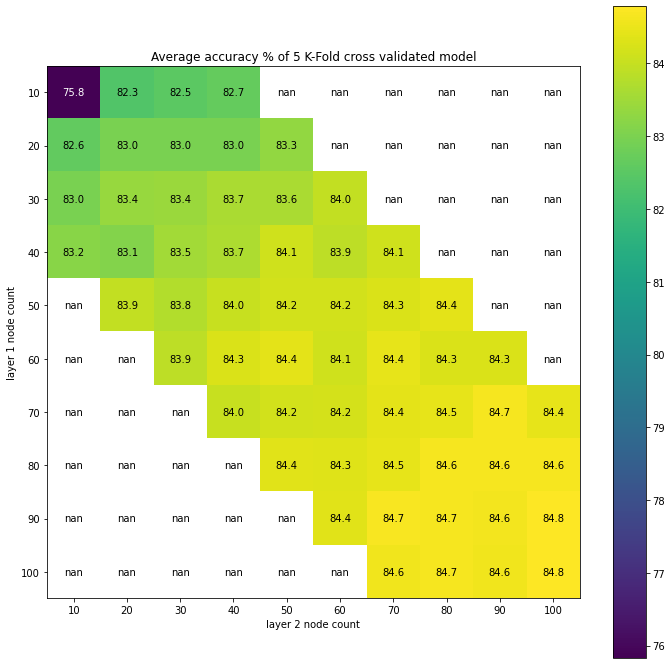

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(results)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(layer2_list)))
ax.set_xticklabels(layer2_list)
ax.set_yticks(np.arange(len(layer1_list)))
ax.set_yticklabels(layer1_list)
plt.xlabel("layer 2 node count")
plt.ylabel("layer 1 node count")

textcolors = ["k", "w"]
threshold = (np.nanmax(results)+np.nanmin(results))/2
# Loop over data dimensions and create text annotations.
for i in range(len(layer1_list)):
    for j in range(len(layer2_list)):
        t = "-" if results[i, j] == np.nan else round(results[i, j],1)
        text = ax.text(j, i, t,
                        ha="center", va="center", color=textcolors[int(results[i, j] < threshold)])

ax.set_title("Average accuracy % of 5 K-Fold cross validated model")
fig.tight_layout()
plt.colorbar(im)

Checking layer1: 85-100, layer2: 85-100, as it's the highest scores on the heatmap.

In [ ]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5
epochs = 100

layer1_start = 85
layer1_end = 101
layer1_step = 5

layer2_start = 85
layer2_end = 101
layer2_step = 5


layer1_list = range(layer1_start, layer1_end, layer1_step)
layer2_list = range(layer2_start, layer2_end, layer2_step)

results = np.empty((len(layer1_list), len(layer2_list)))
results[:] = np.nan

outer_i = 0
for layer1 in layer1_list:
    valid_layer2_list = []
    for i in range(len(layer2_list)):
        if abs(layer2_list[i] - layer1) <= 30:
            valid_layer2_list.append((layer2_list[i], i))
    for layer2 in valid_layer2_list:
        inner_i = layer2[1]
        layer2 = layer2[0]

        np.random.seed(SEED)
        random.seed(SEED)
        torch.manual_seed(SEED)
        torch.cuda.manual_seed(SEED)
        torch.cuda.manual_seed_all(SEED)

        kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=SEED)
        avg_acc = 0
        avg_loss = 0

        for fold, (train_ids, test_ids) in enumerate(kfold.split(Xs_train, y_train)):
            train_Xs_fold = Xs_train.iloc[train_ids]
            test_Xs_fold = Xs_train.iloc[test_ids]
            train_y_fold = y_train.iloc[train_ids]
            test_y_fold = y_train.iloc[test_ids]

            tensor_Xs_fold_train = torch.tensor(train_Xs_fold.values.astype(np.float32))
            tensor_Xs_fold_test = torch.tensor(test_Xs_fold.values.astype(np.float32))
            tensor_y_fold_train = torch.tensor(train_y_fold.values.astype(np.float32))
            tensor_y_fold_test = torch.tensor(test_y_fold.values.astype(np.float32))

            dataset_train_fold = TensorDataset(
                tensor_Xs_fold_train, tensor_y_fold_train
            )
            dataset_test_fold = TensorDataset(tensor_Xs_fold_test, tensor_y_fold_test)

            train_dataloader_kfold = DataLoader(
                dataset_train_fold,
                batch_size=batch_s,
                shuffle=True,
                worker_init_fn=seed_worker,
                num_workers=0,
            )
            test_dataloader_kfold = DataLoader(
                dataset_test_fold,
                batch_size=batch_s,
                shuffle=True,
                worker_init_fn=seed_worker,
                num_workers=0,
            )

            model = Network(10, layer1, layer2, 1).to(device)
            max_epoch_acc = 0
            max_acc_diff = 0.1

            for t in range(epochs):
                train_acc = train(train_dataloader_kfold, model, loss_fn)
                test_result = test(test_dataloader_kfold, model, loss_fn)

                if train_acc - test_result[0] >= (train_acc * max_acc_diff):
                    break
                if test_result[0] > max_epoch_acc:
                    max_epoch_acc = test_result[0]
            avg_acc += max_epoch_acc / k_folds
        print((layer1, layer2), avg_acc)
        results[outer_i][inner_i] = avg_acc
    outer_i += 1

(85, 85) 84.44048010185222
(85, 90) 84.55794442847298
(85, 95) 84.78217791285061
(85, 100) 84.70743722078478
(90, 85) 84.49388179300087
(90, 90) 84.61137464007192
(90, 95) 84.71812098146856
(90, 100) 84.77154548897742
(95, 85) 84.62197854349482
(95, 90) 84.70748285350527
(95, 95) 84.6327193450792
(95, 100) 84.68612103622782
(100, 85) 84.50451992096413
(100, 90) 84.57932335802064
(100, 95) 84.60066235893785
(100, 100) 84.78222354557111


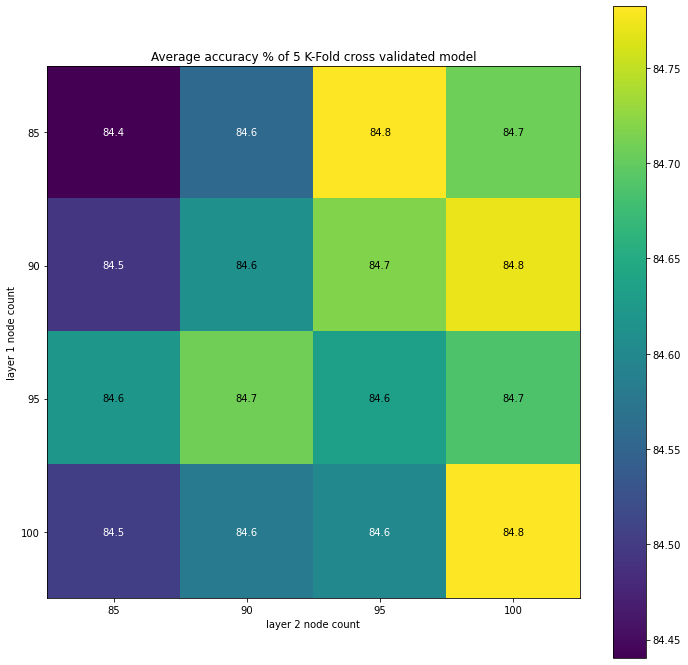

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(results)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(layer2_list)))
ax.set_xticklabels(layer2_list)
ax.set_yticks(np.arange(len(layer1_list)))
ax.set_yticklabels(layer1_list)
plt.xlabel("layer 2 node count")
plt.ylabel("layer 1 node count")

textcolors = ["k", "w"]
threshold = (np.nanmax(results)+np.nanmin(results))/2
# Loop over data dimensions and create text annotations.
for i in range(len(layer1_list)):
    for j in range(len(layer2_list)):
        t = "-" if results[i, j] == np.nan else round(results[i, j],1)
        text = ax.text(j, i, t,
                        ha="center", va="center", color=textcolors[int(results[i, j] < threshold)])

ax.set_title("Average accuracy % of 5 K-Fold cross validated model")
fig.tight_layout()
plt.colorbar(im)

Fine search for layer1: 85-100, layer2: 95-100.

In [ ]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5
epochs = 100

layer1_start = 85
layer1_end = 101
layer1_step = 1

layer2_start = 95
layer2_end = 101
layer2_step = 1


layer1_list = range(layer1_start, layer1_end, layer1_step)
layer2_list = range(layer2_start, layer2_end, layer2_step)

results = np.empty((len(layer1_list), len(layer2_list)))
results[:] = np.nan

outer_i = 0
for layer1 in layer1_list:
    valid_layer2_list = []
    for i in range(len(layer2_list)):
        if abs(layer2_list[i] - layer1) <= 30:
            valid_layer2_list.append((layer2_list[i], i))
    for layer2 in valid_layer2_list:
        inner_i = layer2[1]
        layer2 = layer2[0]

        np.random.seed(SEED)
        random.seed(SEED)
        torch.manual_seed(SEED)
        torch.cuda.manual_seed(SEED)
        torch.cuda.manual_seed_all(SEED)

        kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=SEED)
        avg_acc = 0
        avg_loss = 0

        for fold, (train_ids, test_ids) in enumerate(kfold.split(Xs_train, y_train)):
            train_Xs_fold = Xs_train.iloc[train_ids]
            test_Xs_fold = Xs_train.iloc[test_ids]
            train_y_fold = y_train.iloc[train_ids]
            test_y_fold = y_train.iloc[test_ids]

            tensor_Xs_fold_train = torch.tensor(train_Xs_fold.values.astype(np.float32))
            tensor_Xs_fold_test = torch.tensor(test_Xs_fold.values.astype(np.float32))
            tensor_y_fold_train = torch.tensor(train_y_fold.values.astype(np.float32))
            tensor_y_fold_test = torch.tensor(test_y_fold.values.astype(np.float32))

            dataset_train_fold = TensorDataset(
                tensor_Xs_fold_train, tensor_y_fold_train
            )
            dataset_test_fold = TensorDataset(tensor_Xs_fold_test, tensor_y_fold_test)

            train_dataloader_kfold = DataLoader(
                dataset_train_fold,
                batch_size=batch_s,
                shuffle=True,
                worker_init_fn=seed_worker,
                num_workers=0,
            )
            test_dataloader_kfold = DataLoader(
                dataset_test_fold,
                batch_size=batch_s,
                shuffle=True,
                worker_init_fn=seed_worker,
                num_workers=0,
            )

            model = Network(10, layer1, layer2, 1).to(device)
            max_epoch_acc = 0
            max_acc_diff = 0.1

            for t in range(epochs):
                train_acc = train(train_dataloader_kfold, model, loss_fn)
                test_result = test(test_dataloader_kfold, model, loss_fn)

                if train_acc - test_result[0] >= (train_acc * max_acc_diff):
                    break
                if test_result[0] > max_epoch_acc:
                    max_epoch_acc = test_result[0]
            avg_acc += max_epoch_acc / k_folds
        print((layer1, layer2), avg_acc)
        results[outer_i][inner_i] = avg_acc
    outer_i += 1

(85, 95) 84.78217791285061
(85, 96) 84.57932335802064
(85, 97) 84.62206410484573
(85, 98) 84.4938874970909
(85, 99) 84.52592166687202
(85, 100) 84.70743722078478
(86, 95) 84.75019507988009
(86, 96) 84.56859966870645
(86, 97) 84.52589314642171
(86, 98) 84.54730059641966
(86, 99) 84.83560242035948
(86, 100) 84.55791020393262
(87, 95) 84.76085602420359
(87, 96) 84.62202417621532
(87, 97) 84.75018367169994
(87, 98) 84.61135182371169
(87, 99) 84.78220072921087
(87, 100) 84.63273075325931
(88, 95) 84.52591596278194
(88, 96) 84.60064524666767
(88, 97) 84.51523790618825
(88, 98) 84.80357965875852
(88, 99) 84.67544297963411
(88, 100) 84.39776217138738
(89, 95) 84.48320373640715
(89, 96) 84.70747144532515
(89, 97) 84.53659972346571
(89, 98) 84.50457696186473
(89, 99) 84.63267371235872
(89, 100) 84.68606399532722
(90, 95) 84.71812098146856
(90, 96) 84.60067947120803
(90, 97) 84.69677057237121
(90, 98) 84.72883896669268
(90, 99) 84.68612674031787
(90, 100) 84.77154548897742
(91, 95) 84.56864530142

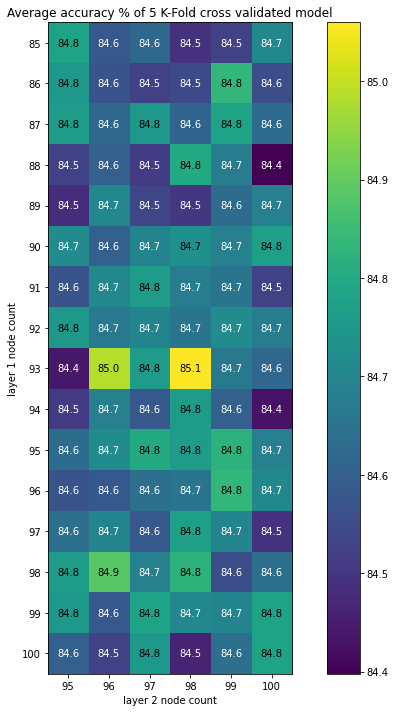

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(results)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(layer2_list)))
ax.set_xticklabels(layer2_list)
ax.set_yticks(np.arange(len(layer1_list)))
ax.set_yticklabels(layer1_list)
plt.xlabel("layer 2 node count")
plt.ylabel("layer 1 node count")

textcolors = ["k", "w"]
threshold = (np.nanmax(results)+np.nanmin(results))/2
# Loop over data dimensions and create text annotations.
for i in range(len(layer1_list)):
    for j in range(len(layer2_list)):
        t = "-" if results[i, j] == np.nan else round(results[i, j],1)
        text = ax.text(j, i, t,
                        ha="center", va="center", color=textcolors[int(results[i, j] < threshold)])

ax.set_title("Average accuracy % of 5 K-Fold cross validated model")
fig.tight_layout()
plt.colorbar(im)

Using layer1: 93, layer2: 98, since it has the highest accuracy.

In [ ]:
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)


tensor_Xs_train = torch.tensor(Xs_train.values.astype(np.float32))
tensor_Xs_test = torch.tensor(Xs_test.values.astype(np.float32))
tensor_y_train = torch.tensor(y_train.values.astype(np.float32))
tensor_y_test = torch.tensor(y_test.values.astype(np.float32))

dataset_train = TensorDataset(tensor_Xs_train, tensor_y_train)
dataset_test = TensorDataset(tensor_Xs_test, tensor_y_test)

train_dataloader = DataLoader(
    dataset_train,
    batch_size=batch_s,
    shuffle=True,
    worker_init_fn=seed_worker,
    num_workers=0,
)
test_dataloader = DataLoader(
    dataset_test,
    batch_size=batch_s,
    shuffle=True,
    worker_init_fn=seed_worker,
    num_workers=0,
)

layer1 = 93
layer2 = 98
model = Network(10, layer1, layer2, 1).to(device)

training_acc = 0
max_acc = 85.1 + 3  # don't go higher than 3 precent more than kfold accuracy

t = 1
while training_acc <= max_acc:
    training_acc = train(train_dataloader, model, loss_fn)
    print(f"epoch: {t}, training accuracy: {training_acc}")
    t += 1
test_result = test(test_dataloader, model, loss_fn)
torch.save(model.state_dict(), "model")
print(f"Testing accuracy: {round(test_result[0],2)}")
print(f"Testing loss: {round(test_result[1],4)}")

epoch: 1, training accuracy: 72.1806920119607
epoch: 2, training accuracy: 76.17471166168303
epoch: 3, training accuracy: 77.2212729602734
epoch: 4, training accuracy: 78.09696710807347
epoch: 5, training accuracy: 79.22896198205895
epoch: 6, training accuracy: 79.53865869286629
epoch: 7, training accuracy: 80.21144809910294
epoch: 8, training accuracy: 80.25416488680051
epoch: 9, training accuracy: 80.93763348996156
epoch: 10, training accuracy: 81.32208457923964
epoch: 11, training accuracy: 81.64246048697137
epoch: 12, training accuracy: 81.87740281930799
epoch: 13, training accuracy: 81.9841947885519
epoch: 14, training accuracy: 81.93079880392995
epoch: 15, training accuracy: 82.2191371208885
epoch: 16, training accuracy: 82.68902178556172
epoch: 17, training accuracy: 82.79581375480564
epoch: 18, training accuracy: 82.53951302862025
epoch: 19, training accuracy: 82.48611704399829
epoch: 20, training accuracy: 82.95600170867151
epoch: 21, training accuracy: 82.7210593763349
epoch:

Accuracy: 0.85
Precision: 0.9
recall: 0.8
specificity: 0.91
f1-score: 0.85


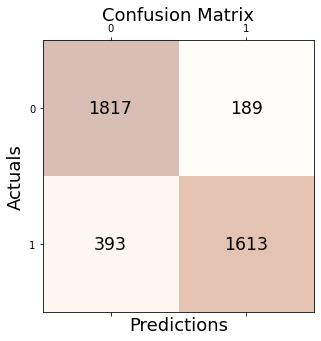

In [ ]:
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)


tensor_Xs_test = torch.tensor(Xs_test.values.astype(np.float32))
tensor_y_test = torch.tensor(y_test.values.astype(np.float32))


model = Network(10, layer1, layer2, 1).to(device)
model.load_state_dict(torch.load("model"))
model.eval()

y_pred = model(tensor_Xs_test.to(device))

y_pred = torch.round(y_pred.data).flatten().cpu().tolist()

print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}")

scores_pos = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=[1]
)
precision = scores_pos[0][0]
recall = scores_pos[1][0]
f1score = scores_pos[2][0]
specificity = metrics.precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=[0]
)[1][
    0
]  # specificity is recall of negative class

print(f"Precision: {round(precision,2)}")
print(f"recall: {round(recall,2)}")
print(f"specificity: {round(specificity,2)}")
print(f"f1-score: {round(f1score,2)}")

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels = [0,1]) # h is negative, g is positive

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Great overall scores, with the highest precision and specificity.